In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

# Analisis replicas generadas en la simulación

## Primero cargamos las replicas en DataFrames distintos y miramos cuantas replicas tenemos para análisis

In [2]:
replicas = []
numero_replicas = 10
for i in range(numero_replicas):
    replicas.append(pd.read_excel("Replica_cliente_{}.xlsx".format(i), sheet_name="Replica"))
print("número de replicas: ",len(replicas))

número de replicas:  10


## Primer acercamiento a los datos (se hará con una sola replica ya que en estructura todas son iguales, EJEMPLO REPLICA 0)

In [3]:
replicas[0].head(10)

,Unnamed: 0,clas_oper1,clas_oper2,costo_operacion1,costo_operacion2,costo_muestreo_operacion1,costo_muestreo_operacion2,tiempo_operacion1,tiempo_operacion2,costo_total_produccion,llega,conformidad,prVuelva,vuelve,prReclamo,Reclama,costo_cliente,costo_proceso,ganancia_proceso
0,0,NaN,NaN,539.132114,913.524157,0.000000,0.000000,6.911950,11.140539,1452.656271,True,PC,0.364168,False,0.340531,False,0,1452.656271,1347.343729
1,1,NaN,NaN,470.756137,865.994912,20.986527,44.095308,8.764352,16.322496,1336.751049,True,PC,0.736829,False,0.081417,False,0,1336.751049,1463.248951
2,2,Desecho,NaN,483.606145,823.732220,0.000000,0.000000,6.200079,10.045515,1307.338366,True,PNC,0.510873,True,0.340414,True,60000,61307.338366,-58507.338366
3,3,NaN,NaN,339.856703,817.052723,0.000000,58.445154,4.357137,17.600620,1156.909426,True,PC,0.273049,False,0.589592,False,0,1156.909426,1643.090574
4,4,Reproceso,NaN,809.407765,938.522735,19.243649,40.690233,12.879402,16.762067,1747.930500,True,PC,0.815832,False,0.742131,False,0,1747.930500,1052.069500
5,5,NaN,NaN,457.564360,968.453373,17.567486,41.822830,8.150626,17.275062,1426.017733,True,PC,0.539743,False,0.535357,False,0,1426.017733,1373.982267
6,6,NaN,NaN,543.699960,841.492130,0.000000,0.000000,6.970512,10.262099,1385.192091,True,PC,0.118934,False,0.411117,False,0,1385.192091,1414.807909
7,7,Reproceso,NaN,396.863046,776.877415,0.000000,0.000000,5.087988,9.474115,1173.740462,True,PNC,0.758759,False,0.075144,False,170000,171173.740462,-168373.740462
8,8,NaN,NaN,470.323520,921.215248,0.000000,38.769032,6.029789,16.299972,1391.538768,True,PC,0.555585,False,0.731600,False,0,1391.538768,1408.461232
9,9,NaN,NaN,526.885174,863.545528,18.191390,26.111172,9.120485,13.942782,1390.430702,True,PC,0.713725,False,0.517341,False,0,1390.430702,1409.569298


### Eliminaremos la columna de indices del archivo para dejar unicamente la del editor y reemplazamos los datos "NaN" o nulos por vacios debido a que son más faciles de trabajar

In [4]:
for i in range(len(replicas)):
    replicas[i] = replicas[i].drop(replicas[i].columns[[0]], axis="columns").fillna("")

#### Así quedan las replicas después de haber hecho este proceso (EJEMPLO REPLICA 1)

In [5]:
replicas[1][-10:]

,clas_oper1,clas_oper2,costo_operacion1,costo_operacion2,costo_muestreo_operacion1,costo_muestreo_operacion2,tiempo_operacion1,tiempo_operacion2,costo_total_produccion,llega,conformidad,prVuelva,vuelve,prReclamo,Reclama,costo_cliente,costo_proceso,ganancia_proceso
975,,,411.207843,949.795172,21.474384,58.974585,8.064352,19.288606,1361.003014,True,PC,0.438627,False,0.069414,False,0,1361.003014,1438.996986
976,,,474.475057,769.197871,0.000000,0.000000,6.083014,9.380462,1243.672928,True,PC,0.488329,False,0.147480,False,0,1243.672928,1556.327072
977,,,459.960100,921.204554,0.000000,63.937354,5.896924,19.588386,1381.164655,True,PC,0.952581,False,0.076170,False,0,1381.164655,1418.835345
978,,,477.840669,844.950721,18.324006,51.072423,8.508954,16.977503,1322.791390,True,PC,0.525485,False,0.667247,False,0,1322.791390,1477.208610
979,Reproceso,,943.569297,921.971271,20.380453,0.000000,14.747248,11.243552,1865.540568,True,PC,0.081635,False,0.339499,False,0,1865.540568,934.459432
980,,,503.654280,845.138527,20.332402,40.969714,9.101063,15.659753,1348.792807,True,PC,0.371685,False,0.526004,False,0,1348.792807,1451.207193
981,,,545.944127,816.914888,0.000000,0.000000,6.999284,9.962377,1362.859015,True,PC,0.652457,False,0.077093,False,0,1362.859015,1437.140985
982,,Reproceso,471.136059,899.529939,18.789446,0.000000,8.483522,10.969877,1370.665998,True,PNC,0.541199,True,0.007798,True,60000,61370.665998,-58570.665998
983,,,390.387461,847.284107,20.193800,0.000000,7.630901,10.332733,1237.671568,True,PC,0.254551,False,0.004695,False,0,1237.671568,1562.328432
984,,,479.535479,822.446278,18.785846,53.763488,8.590739,17.054679,1301.981757,True,PC,0.665877,False,0.536136,False,0,1301.981757,1498.018243


## Explicación de cada una de las columnas de las replicas final
<ul> 
    <li>clas_oper1: Está columna tiene 3 posibles valores. "Reproceso", "Desecho" y "". Donde si el producto fue muestreado se realizaran los debidos procedimientos a este y se le sumaran los respectivos costos de muestreo.</li>
    <li>clas_oper2: Está columna tiene 5 posibles valores. "Desecho", "Reproceso", "Reparacion", "Reclasificación" y "". Donde de acuerdo al muestreo realizado en cada operación se le realizaran los respectivos procesos y se le sumaran los respectivos costos a la operación.</li>
    <li>costo_operacion1: Está columna tiene la información sobre los costos de la operación 1 sumados a los del muestreo 1.</li>
    <li>costo_operacion2: Está columna tiene la información sobre los costos de la operación 2 sumados a los del muestreo 2.</li>
    <li>costo_muestreo_operacion1: Está columna contiene los costos por muestreo en la operación 1.</li>
    <li>costo_muestreo_operacion2: Está columna contiene los costos por muestreo en la operación 2. </li>
    <li>tiempo_operacion1: Está columna contiene los tiempos totales de la operación 1.</li>
    <li>tiempo_operacion2: Está columna contiene los tiempos totales de la operación 2.</li>
    <li>costo_total_produccion: Está columna tiene la suma de los costos de la operación 1 y la operación 2.</li>
    <li>llega: Dado que en la operación 2 existen productos a los que se les realiza preventa estos productos no llegan a un cliente final por tanto está columna se crea buscando filtrar aquellos productos que se les realizo esta preventa y no llegan al cliente final.</li>
    <li>conformidad: Está columna tiene información sobre que producto llega al cliente como un producto conforme y cual llega como un producto no conforme. (Se considera un producto como no conforme si no cumple con los parametros de alguna de las dos operaciones, por tanto si, por ejemplo, un producto requiere de un reproceso pero este no es muestreado el producto será catalogado como no conforme, por el contrario si el producto requiere de un reproceso pero este es muestreado el producto sera catalogado como producto conforme)</li>
    <li>prVuelva: Está columna tiene los valores aleatorios requeridos para determinar si un cliente vuelve o no vuelve a la tienda al recibir un producto no conforme.</li>
    <li>vuelve: Esta columna tiene 2 posibles valores. "True" o "False". Donde si un cliente recibe un producto conforme este automaticamente tomara el valor de "False", pero si recibe un producto no conforme se le clasificara de acuerdo al valor generado en la columna anterior.</li>
    <li>prReclamo: Está columna tiene los aleatorios requeridos para determinar si un cliente que vuelve a la tienda reclama o no.</li>
    <li>Reclama: Está columna tiene dos posibles valores. "True" o "False". Donde la columna tomara "True" si el cliente vuelve a la tienda y si supera la probabilidad establecida para que este reclame.</li>
    <li>costo_cliente: Está columna tiene tres posibles valores "60000" que se asignara si el cliente recibe un producto no conforme y reclama, "170000" que se asignara si el cliente recibe un producto no conforme y no vuelve a la tienda y "0" en cualquier otro caso</li>
    <li>costo_proceso: Está columna tiene la suma del costo generado por un cliente y el costo generado por el proceso de fabricación del producto "costo_total_produccion + costo_cliente"</li>
    <li>ganancia_proceso: Está columna tiene la resta del costo de venta del producto y el costo del proceso de fabricación de un producto "2800 - costo_proceso"</li>
</ul>

#### Para empezar analizaremos los costos individuales de cada operación con su respectivo muestreo y los costos totales de estas dos operaciones juntas, así como también los costos por clientes que recibieron productos no conformes y los costos promedios de todo el procedimiento  (Haremos este procedimiento para todas las replicas en conjunto)

In [6]:
promedio_costos_operacion1 = []
promedio_costos_operacion2 = []
promedio_costos_operaciones = []
PromedioCostos_clientes_inconformes = []
promedioCostos_clientes = []
costos_proceso = []
ganancias_promedio = []
for i in range(len(replicas)):
    promedio_costos_operacion1.append(replicas[i].costo_operacion1.mean())
    promedio_costos_operacion2.append(replicas[i].costo_operacion2.mean())
    promedio_costos_operaciones.append(replicas[i].costo_total_produccion.mean())
    PromedioCostos_clientes_inconformes.append(replicas[i].costo_cliente[(replicas[i].conformidad == "PNC") & 
                                                                   (replicas[i].llega == True)].mean())
    promedioCostos_clientes.append(replicas[i].costo_cliente[replicas[i].llega == True].mean())
    costos_proceso.append(replicas[i].costo_proceso.mean())
    ganancias_promedio.append(replicas[i].ganancia_proceso.mean())

In [7]:
print("Promedio costos operación 1:", sum(promedio_costos_operacion1)/numero_replicas)
print("Promedio costos operación 2:", sum(promedio_costos_operacion2)/numero_replicas)
print("Promedio costos operaciones:", sum(promedio_costos_operaciones)/numero_replicas)
print("Promedio costos por cliente:", sum(promedioCostos_clientes)/numero_replicas)
print("Promedio costos clientes inconformes:", sum(PromedioCostos_clientes_inconformes)/numero_replicas)
print("Promedio de costos de todo el procedimiento:", sum(costos_proceso)/numero_replicas)
print("Promedio ganancias de todo el proceso:", sum(ganancias_promedio)/numero_replicas)

Promedio costos operación 1: 484.7649153550712
Promedio costos operación 2: 893.0581531274541
Promedio costos operaciones: 1377.8230684825253
Promedio costos por cliente: 9351.967699550298
Promedio costos clientes inconformes: 79843.30777172772
Promedio de costos de todo el procedimiento: 10697.954184036793
Promedio ganancias de todo el proceso: -7897.954184036795


### Análisis

Con base a los datos encontrados anteriormente se evidencia que el costo no está siendo cubierto por el precio de venta. Como se puede notar los costos promedio por cliente que recibe un producto no conforme son muy elevados e incluso si tenemos en cuenta los clientes que recibieron un producto conforme estos costos siguen estando muy por encima del precio de venta de un producto. De acuerdo a esto haremos un conteo de cuantos productos conformes se están produciendo en cada Replica de la simulación

In [8]:
for i in range(len(replicas)):
    print("Replica {}".format(i))
    print(replicas[i].conformidad.value_counts())
    print()


Replica 0
PC     881
PNC    111
Name: conformidad, dtype: int64

Replica 1
PC     855
PNC    130
Name: conformidad, dtype: int64

Replica 2
PC     864
PNC    123
Name: conformidad, dtype: int64

Replica 3
PC     846
PNC    133
Name: conformidad, dtype: int64

Replica 4
PC     880
PNC    103
Name: conformidad, dtype: int64

Replica 5
PC     880
PNC    108
Name: conformidad, dtype: int64

Replica 6
PC     895
PNC     95
Name: conformidad, dtype: int64

Replica 7
PC     872
PNC    115
Name: conformidad, dtype: int64

Replica 8
PC     871
PNC    113
Name: conformidad, dtype: int64

Replica 9
PC     865
PNC    123
Name: conformidad, dtype: int64



### Análisis
En la mayor parte de las replicas se observa que más de 100 productos son productos no conformes, dado que la forma que existe de evitar que un producto pase como no conforme y llegue al cliente es mediante el muestreo una posible solución a este problema puede ser aumentar la cantidad de productos a los que se les realiza muestreo para así lograr disminuir la cantidad de productos no conformes que llegan al cliente y consecuentemento reducir los costos por cliente

Para mostrar este punto calculemos la ganancia obtenida promedio al tener en cuenta unicamente los productos conformes

In [9]:
ganancia_promedio_pc = []
for i in range(len(replicas)):
    ganancia_promedio_pc.append(replicas[i].ganancia_proceso[replicas[i].conformidad == "PC"].mean())
contador = 0
for valor in ganancia_promedio_pc:    
    print("Ganancia promedio replica {}:".format(contador),valor)
    contador += 1

Ganancia promedio replica 0: 1412.0385267492234
Ganancia promedio replica 1: 1418.3514005941763
Ganancia promedio replica 2: 1425.6075664788646
Ganancia promedio replica 3: 1421.3661678808314
Ganancia promedio replica 4: 1417.543418319309
Ganancia promedio replica 5: 1412.8968290493444
Ganancia promedio replica 6: 1426.0346165923604
Ganancia promedio replica 7: 1398.3324031873817
Ganancia promedio replica 8: 1412.0956722607336
Ganancia promedio replica 9: 1417.1877180809292


In [10]:
print("Ganancia Promedio PC:",np.mean(ganancia_promedio_pc))
print("Desviacion estandar Ganancia PC:",np.std(ganancia_promedio_pc))

Ganancia Promedio PC: 1416.1454319193153
Desviacion estandar Ganancia PC: 7.639474515253516


In [11]:
perdida_promedio_pnc = []
for i in range(len(replicas)):
    perdida_promedio_pnc.append(replicas[i].ganancia_proceso[(replicas[i].llega == True) & 
                                                          (replicas[i].conformidad == "PNC")].mean())
contador = 0
for valor in perdida_promedio_pnc:    
    print("Perdida promedio replica {}:".format(contador),valor)
    contador += 1

Perdida promedio replica 0: -80870.1564548541
Perdida promedio replica 1: -75235.12982745585
Perdida promedio replica 2: -77135.14004012833
Perdida promedio replica 3: -71997.38078523679
Perdida promedio replica 4: -90185.8674592363
Perdida promedio replica 5: -80412.72648675933
Perdida promedio replica 6: -71783.46654197521
Perdida promedio replica 7: -77213.82465213127
Perdida promedio replica 8: -78334.0011406748
Perdida promedio replica 9: -80586.94505744317


In [12]:
print("Perdida Promedio:",np.mean(perdida_promedio_pnc))
print("Desviacion estandar Perdida:",np.std(perdida_promedio_pnc))

Perdida Promedio: -78375.46384458951
Desviacion estandar Perdida: 5016.331434291232


### Análisis
Como se puede apreciar, la pérdida obtenida con los productos no conformes es muy superior con respecto a la ganancia obtenida por los productos conformes. Si, al realizar el muestreo se evidencia que el producto requiere un proceso adicional para no clasificar como un producto no conforme, necesariamente el costo de producción de ese producto puntual va a ser superior con respecto al producto que no requiere este proceso adicional. Pero si en concordancia, se compara este costo de producción más alto en el proceso adicional con respecto a las pérdidas obtenidas por un producto no conforme se puede evidenciar que aún con el aumento de dicho costo, se obtendrán menos pérdidas que al permitir que el cliente obtenga un producto no conforme. Evidencia de ello al verificar dentro de la replica número 1 el producto 979 al que se le realizo un reproceso tiene un costo de operación (1865.540568) mucho más elevado que el promedio obtenido anteriormente (1377.8230684825253) este es un costo que continua generando ganancias, a diferencia de si el producto fuera no conforme que generaria un costo por cliente muy elevado.

vamos a calcular los costos promedio para cada replica de producir un producto conforme y también los costos promedio para cada replica de producir un producto no conforme, posteriormente se realizaran una gráfica que permitan hacer una comparación entre las ganancias y las perdidas

In [13]:
costo_promedio_pc = []
costo_promedio_pnc = []
for i in range(len(replicas)):
    costo_promedio_pc.append(replicas[i].costo_proceso[replicas[i].conformidad == "PC"].mean())
    costo_promedio_pnc.append(replicas[i].costo_proceso[replicas[i].conformidad == "PNC"].mean())

<IPython.core.display.Javascript object>


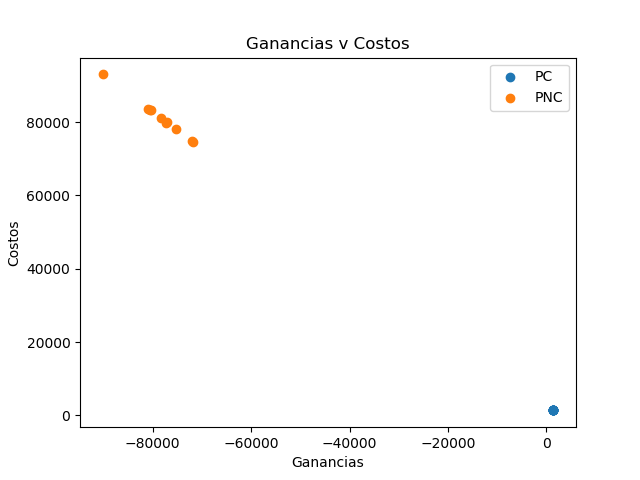

In [14]:
plt.title("Ganancias v Costos")
plt.xlabel("Ganancias")
plt.ylabel("Costos")
plt.scatter(ganancia_promedio_pc,costo_promedio_pc,label="PC")
plt.scatter(perdida_promedio_pnc,costo_promedio_pnc,label="PNC")
plt.legend()

### Análisis
Se puede apreciar que las ganancias producidas por productos conformes son muy pequeñas comparativamente con las perdidas producidas por los productos no conformes